# MMI Coupler analysis

In [1]:
import sys, os
sys.path.append(os.path.abspath("../.."))
from scripts import specifications as spec
import scripts.material_data_base as mdb
from scripts.mmi_builder import build_mmi_simulation, plot_mmi_layout
import gdstk
import matplotlib.pylab as plt
import numpy as np
import tidy3d as td
import tidy3d.web as web

# Material Definition

In [2]:
lambda_scaled = spec.λ * 1e-3
freq0 = td.C_0 / lambda_scaled  

# Materials.
n_si = mdb.Si_n(lambda_scaled)
n_sio2 = mdb.SiO2_n(lambda_scaled)

# Material definitions.
mat_si = td.Medium(permittivity=n_si**2)  # Silicon waveguide material.
mat_sio2 = td.Medium(permittivity=n_sio2**2)  # SiO2 substrate material



In [3]:
print(n_si, n_sio2)

3.477719172627938 1.4440236532439585


# First Iteration Design

For a MMI Coupler the 

$$L_{\pi} = \frac{\pi}{\Delta \beta_{01}}$$

$$\Delta \beta_{01} = \frac{3 \cdot \pi}{2 \cdot N_1 \cdot k_0 \cdot W^2}$$

where $k_0$ is the wavenumber in vacuum. For a 3dB coupling we see that 

$$L_{3dB} = \frac{3}{2}L_{\pi}$$


# Structure Builder

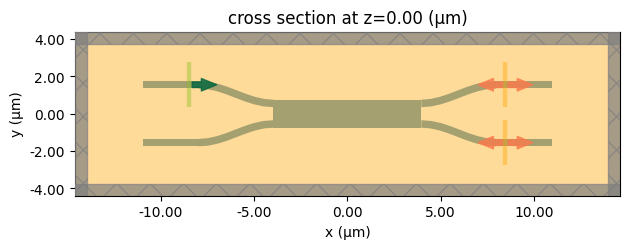

In [4]:

sim = build_mmi_simulation(
    w_wg=spec.w_wg_MMI,
    h_si=spec.h_MMI,
    w_mmi=spec.w_MMi,
    l_mmi=spec.l_MMi,
    gap=spec.gap_MMi,
    l_input=spec.l_input_MMi,
    l_output=spec.l_output_MMi,
    s_bend_offset=spec.s_bend_offset_MMi,
    s_bend_length=spec.s_bend_length_MMi,
    mat_si=mat_si,
    mat_sio2=mat_sio2,
    lambda_0=1.55,  # convert µm → m
    lambda_min=1.5,
    lambda_max=1.6,  # small offset to avoid zero-length array
    lambda_step=0.01
)

ax = sim.plot(z=0)
fig_2d = ax.figure
plt.show(block=True)

Seems like the length for 3dB power split needs to quite large however decreasing the width of the MMI cores gives bigger coupling between the input arms

# 3D View

In [5]:
# 3D Visualization
fig_3d = sim.plot_3d()

In [6]:
# Cost Estimation
job = web.Job(simulation=sim, task_name="mmi_2x2_cost_estimation", verbose=True)
cost_info = web.estimate_cost(job.task_id)
print(f"Estimated cost: {cost_info:.4f} Flex Credits")

12:52:07 Romance Standard Time Created task 'mmi_2x2_cost_estimation' with      
                               task_id                                          
                               'fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15' and  
                               task_type 'FDTD'.

                               View task using web UI at                        
                               ]8;id=218881;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=725372;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\taskId]8;;\
                               ]8;id=218881;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\=]8;;\]8;id=7571;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\fdve]8;;\]8;id=218881;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\-549f824c-cc56-48d8-b502-8e01bb4f0c15']8;;\.

                               Task folder: ]8;id=667626;https://tidy3d.simulation.cloud/folders/folder-3a1391e3-c4ac-4fa6-9e9e-c5fb5d75d224\'default']8;;\.

c:\Users\phill\AppData\Local\Programs\Python\Python313\Lib\site-packages\rich\li
ve.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

12:52:10 Romance Standard Time Maximum FlexCredit cost: 0.770. Minimum cost     
                               depends on task execution details. Use           
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

12:52:11 Romance Standard Time Maximum FlexCredit cost: 0.770. Minimum cost     
                               depends on task execution details. Use           
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

Estimated cost: 0.7703 Flex Credits


In [7]:
sim_data = job.run(path="simulation_data/MMI_COUPLER_data/mmi_2x2_results.hdf5")

12:52:13 Romance Standard Time status = queued

                               To cancel the simulation, use                    
                               'web.abort(task_id)' or 'web.delete(task_id)' or 
                               abort/delete the task in the web UI. Terminating 
                               the Python script will not stop the job running  
                               on the cloud.

12:52:25 Romance Standard Time starting up solver

                               running solver

12:53:13 Romance Standard Time early shutoff detected at 40%, exiting.

12:53:14 Romance Standard Time status = postprocess

12:53:16 Romance Standard Time status = success

12:53:18 Romance Standard Time View simulation result at                        
                               ]8;id=406885;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=325520;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\taskId]8;;\
                               ]8;id=406885;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\=]8;;\]8;id=596044;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\fdve]8;;\]8;id=406885;https://tidy3d.simulation.cloud/workbench?taskId=fdve-549f824c-cc56-48d8-b502-8e01bb4f0c15\-549f824c-cc56-48d8-b502-8e01bb4f0c15']8;;\.

12:53:24 Romance Standard Time loading simulation from                          
                               simulation_data/MMI_COUPLER_data/mmi_2x2_results.
                               hdf5

In [9]:
wavelengths = np.arange(1.5, 1.6, 0.01)  # 1.5 to 1.6 μm with 10 nm steps
# Extract mode coefficients from ModeMonitors
mode_coeff_1 = sim_data["mode_output_1"].amps.sel(mode_index=0, direction="+")
mode_coeff_2 = sim_data["mode_output_2"].amps.sel(mode_index=0, direction="+")

# Calculate power splitting
power_1 = np.abs(mode_coeff_1) ** 2
power_2 = np.abs(mode_coeff_2) ** 2
total_power = power_1 + power_2

# Calculate splitting ratio
splitting_ratio_1 = power_1 / total_power
splitting_ratio_2 = power_2 / total_power

# Ensure arrays are numpy arrays for consistent indexing
splitting_ratio_1 = np.array(splitting_ratio_1)
splitting_ratio_2 = np.array(splitting_ratio_2)
total_power = np.array(total_power)
